# Frequency-domain ODMR measurement



![frequency-shceduling](./figure/frequency-shceduling.jpg)


Import necessary modules and functions firstly

In [1]:
import matplotlib.pyplot as plt
from odmactor.scheduler import CWScheduler, PulseScheduler
import scipy.constants as C
import numpy as np
import time


## CW ODMR

**1. Set measurement parameters**
- Time bin $t$ per readout operation, number of readout operation $N$ per frequency measurement point
- MW power $p$, MW frequencies for scanning modes, i.e., `[freq_start, freq_end, freq_step]`, unit: "Hz"


In [3]:
t_ns = 1e5
N = int(1e5 / 4)

freq_start = 2.84 * C.giga
freq_end = 2.9 * C.giga
freq_step = 1 * C.mega
p = 1


**2. Construct a Continous-wave Scheduler and run**


In [3]:
scheduler = CWScheduler()
scheduler.configure_mw_paras(p)
scheduler.configure_odmr_seq(t_ns, N)
scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_tagger_counting()

scheduler.run_scanning(with_ref=True)
scheduler.close()



--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}
Begin to run CW ODMR Scheduler. Frequency: 2.820 - 2.920 GHz.
t: 100000.00 ns, N: 25000, T: 0.00 s, n_freqs: 101
Estimated total running time: 252.50 s
MW on/off status: True
scanning freq 2.820 GHz
scanning freq 2.821 GHz
scanning freq 2.822 GHz
scanning freq 2.823 GHz
scanning freq 2.824 GHz
scanning freq 2.825 GHz
scanning freq 2.826 GHz
scanning freq 2.827 GHz
scanning freq 2.828 GHz
scanning freq 2.829 GHz
scanning freq 2.830 GHz
scanning freq 2.831 GHz
scanning freq 2.832 GHz
scanning freq 2.833 GHz
scanning freq 2.834 GHz
scanning freq 2.835 GHz
scanning freq 2.836 GHz
scanning freq 2.837 GHz
scanning freq 2.838 GHz
scanning freq 2.839 GHz
scanning freq 2.840 GHz
scanning freq 2.841 GHz
scanning freq 2.842 GHz
scanning freq 2.843 GHz
scanning freq 2.844 GHz
scanning freq 2.845 GHz
scanning freq 2.846 GHz
scanning freq 2.847 GHz
scanning freq 2.848 GHz
scanning freq 2.849 GHz
scanning freq 2.850 GHz
sc



**3. Calculate contrast and plot figures**

In [4]:
## count & contrast
res_on_off = scheduler.result  # [freqs, counts, counts_ref]
contrast = [sig / ref for sig, ref in zip(res_on_off[1], res_on_off[2])]

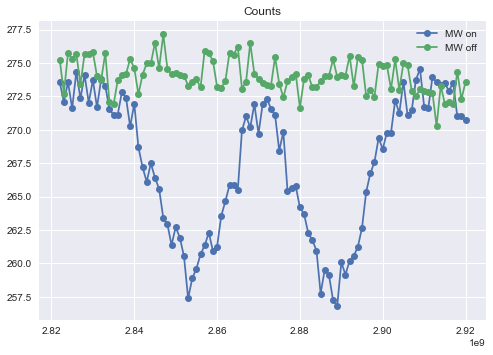

In [5]:
plt.style.use('seaborn')

plt.plot(res_on_off[0][2:], res_on_off[1][2:], 'o-', label='MW on')
plt.plot(res_on_off[0][2:], res_on_off[2][2:], 'o-', label='MW off')
plt.legend()
plt.title('Counts')
plt.show()

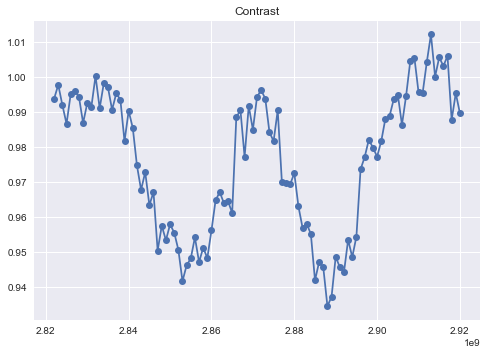

In [6]:
plt.plot(res_on_off[0][2:], contrast[2:], 'o-')
plt.title('Contrast')
plt.show()

2.86

**4. Save data result**

In [19]:

np.savetxt('cw-counting--{}dBm.txt'.format(p), np.array(res_on_off))
np.savetxt('cw-contrast--{}dBm.txt'.format(p), np.vstack([res_on_off[0], contrast]).T)


## Pulse ODMR


**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- MW power $p$, MW frequencies for scanning modes, i.e., `[freq_start, freq_end, freq_step]`, unit: "Hz"
- laser initilization time $t_{init}$, MW operation time $t_{mw}$, singal readout pulse time $t_{sig}$
- optional default parameters: reference signals readout time $t_{ref}$ ($t_{ref} = t_{sig}$ actually), some time interval parameters
- Time bin $t$ per readout operation is then calculated by the sequences parameters

In [8]:
freq_start = 2.85 * C.giga
freq_end = 2.89 * C.giga
freq_step = 2 * C.mega

t_init = 3e3
t_mw = 800

inter_init_mw = 3000
inter_mw_read = 0

inter_readout = 0
t_read_sig = 800
t_read_ref = t_read_sig
pre_read = 100

N = int(1e6/4)

p = 15


**2. Construct a Pulse ODMR Scheduler and run**

In [9]:
scheduler = PulseScheduler(mw_ttl=0)
scheduler.configure_mw_paras(power=p)

# single-signal readout

scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=t_read_sig, inter_init_mw=inter_init_mw,
                             pre_read=pre_read, inter_mw_read=inter_mw_read, inter_readout=inter_readout, N=N)
# or readout with reference signals
# scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=400, t_read_ref=400,inter_init_mw=inter_init_mw, N=N)

scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_tagger_counting(reader='cbm')




--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


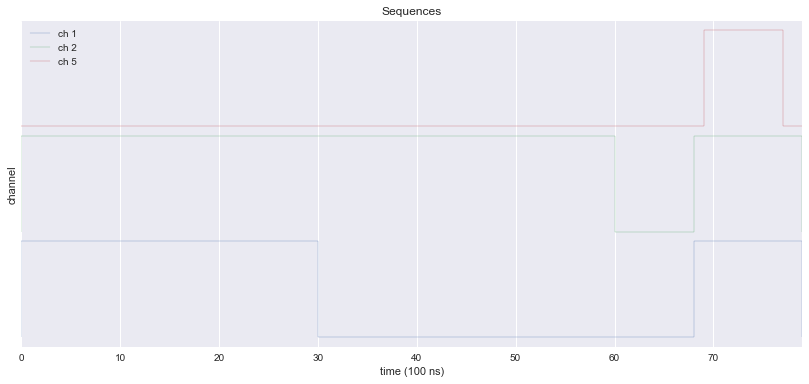

In [10]:
# observe sequences
fig = scheduler.sequences_figure


In [11]:
scheduler.run_scanning()

scheduler.close()


Begin to run Pulse ODMR Scheduler. Frequency: 2.850 - 2.890 GHz.
t: 7900.00 ns, N: 250000, T: 1.98 s, n_freqs: 21
Estimated total running time: 41.48 s
MW on/off status: True
scanning freq 2.850 GHz
scanning freq 2.852 GHz
scanning freq 2.854 GHz
scanning freq 2.856 GHz
scanning freq 2.858 GHz
scanning freq 2.860 GHz
scanning freq 2.862 GHz
scanning freq 2.864 GHz
scanning freq 2.866 GHz
scanning freq 2.868 GHz
scanning freq 2.870 GHz
scanning freq 2.872 GHz
scanning freq 2.874 GHz
scanning freq 2.876 GHz
scanning freq 2.878 GHz
scanning freq 2.880 GHz
scanning freq 2.882 GHz
scanning freq 2.884 GHz
scanning freq 2.886 GHz
scanning freq 2.888 GHz
scanning freq 2.890 GHz
finished data acquisition
Detailed data result has been saved into ../output/Pulse-counts-2022-02-11-15b9ade3-8b80-11ec-b7c4-046c59258eff.json
Stopped: Scheduling process has stopped
Closed: All instrument resources has been released


**3. Calculate contrast and plot figures**

In [16]:
## count & contrast
counts_sig_ref = scheduler.result  # [freqs, counts, counts_ref]

# contrast = [sig / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

In [13]:
scheduler.means[:3]


[14.309232, 14.370912, 14.370912]

In [8]:
counts_sig_ref[1][:10]

[14.594932,
 14.897048,
 14.8482,
 15.012788,
 14.893188,
 14.989752,
 15.017852,
 15.00222,
 15.069268,
 14.793776]

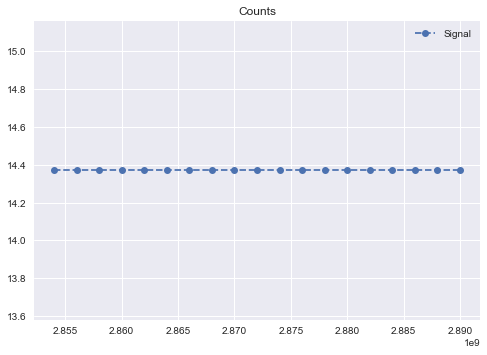

In [17]:
plt.style.use('seaborn')
plt.plot(counts_sig_ref[0][2:], counts_sig_ref[1][2:], 'o--', label='Signal')
# plt.plot(counts_sig_ref[0], counts_sig_ref[2], 'o-', label='Reference')
plt.legend()
plt.title('Counts')
plt.show()




In [25]:
plt.plot(counts_sig_ref[0], contrast, '-')
plt.title('Pulse ODMR Contrast')
plt.show()

NameError: name 'contrast' is not defined

In [2]:
from odmactor.utils.asg import ASG

asg = ASG()


--- USE ASGDLL_x64.dll ---


In [5]:
asg.checkdata([[10, 10, 10, 0]], [4])


True

---
test_bi-pulse

In [5]:
pre_read = 1e6
t_read_sig = 500
inter_readout = 200
t_read_ref = t_read_sig
inter_period = 100
after_laser = 2e3
N = int(1e6*2)

freq_start = 2.86 * C.giga
freq_end = 2.88 * C.giga
freq_step = 2 * C.mega

tagger_seq = [0, pre_read, t_read_sig, inter_readout, t_read_ref, inter_period + after_laser]
t = sum(tagger_seq)
laser_seq = [t - after_laser, after_laser]
mw_seq = [t, 0]

scheduler = PulseScheduler(mw_ttl=0)

scheduler._conf_time_paras(t, N)
scheduler.download_asg_sequences(laser_seq=laser_seq, mw_seq=mw_seq, tagger_seq=tagger_seq, N=N)

scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.two_pulse_readout = True
scheduler.configure_tagger_counting(reader='cbm')

scheduler.run_scanning(mw_control='off')




--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}
Begin to run Pulse ODMR Scheduler. Frequency: 2.860 - 2.880 GHz.
t: 4300.00 ns, N: 4000000, T: 17.20 s, n_freqs: 11
Estimated total running time: 189.20 s
MW on/off status: True
scanning freq 2.860 GHz
scanning freq 2.862 GHz
scanning freq 2.864 GHz
scanning freq 2.866 GHz
scanning freq 2.868 GHz
scanning freq 2.870 GHz
scanning freq 2.872 GHz
scanning freq 2.874 GHz
scanning freq 2.876 GHz
scanning freq 2.878 GHz
scanning freq 2.880 GHz
finished data acquisition
Detailed data result has been saved into ../output/Pulse-counts-with-ref-2022-02-08-cddc168c-893a-11ec-81b3-046c59258eff.json
Stopped: Scheduling process has stopped


In [6]:
res = scheduler.result

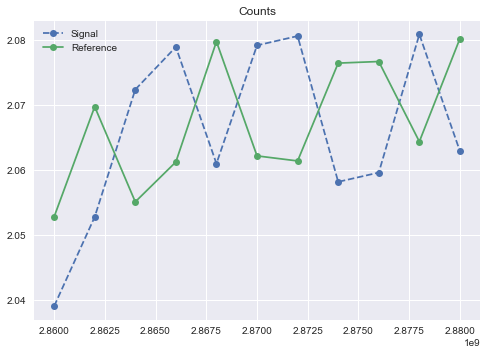

In [7]:
plt.style.use('seaborn')
plt.plot(res[0], res[1], 'o--', label='Signal')
plt.plot(res[0], res[2], 'o-', label='Reference')
plt.legend()
plt.title('Counts')
plt.show()



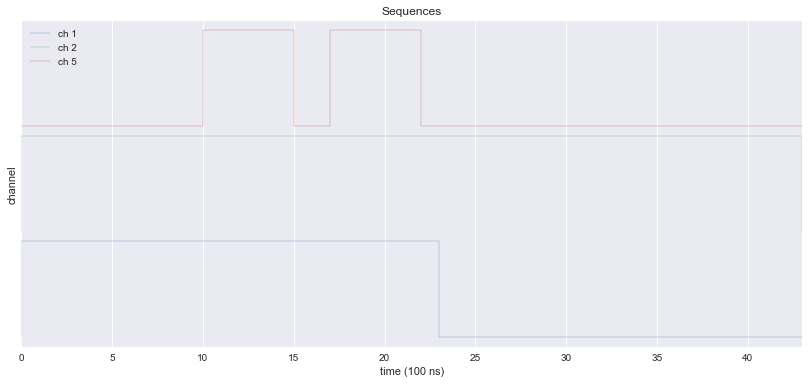

In [21]:
fig = scheduler.sequences_figure



In [9]:

res_detail = scheduler.result_detail['origin_data']

In [11]:
p3_sig = res_detail[3][::2]
p3_ref = res_detail[3][1::2]

(array([1.476379e+06, 1.144288e+06, 8.058370e+05, 3.895070e+05,
        1.379980e+05, 3.701500e+04, 7.518000e+03, 1.256000e+03,
        1.810000e+02, 2.100000e+01]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

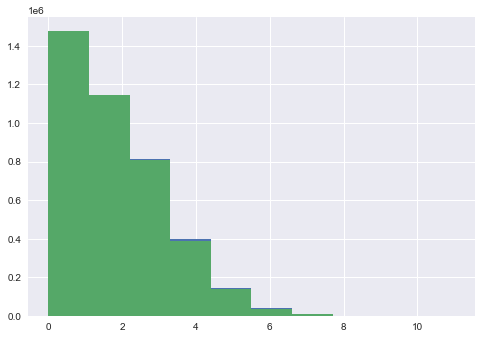

In [12]:
plt.hist(p3_sig[：1000])
plt.hist(p3_ref)